<a href="https://colab.research.google.com/github/leesy211/welcome_to_jibang/blob/main/FINAL%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('max_rows',500)    #출력할 max row를 지정
pd.set_option('max_columns',30)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
#pd.set_option('display.float_format', '{:.4f}'.format)

#데이터 로드

In [ ]:
data = pd.read_csv('/content/Data_09.07_DA_2.xlsx - 사용데이터.csv', thousands=',')

In [ ]:
data.head()

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
0,201901,11110,서울특별시 종로구,2,6755,18928.0,2093.0,17945.0,27489.0,486.0,32031.0,74639,25932,14251,1.490000e+11,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,62.7,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
1,201901,11140,서울특별시 중구,1,5919,3448.0,NaN,20020.0,5944.0,280.0,80898.0,69779,96131,10027,1.000000e+12,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
2,201901,11170,서울특별시 용산구,1,2744,486.0,280.0,31481.0,26669.0,582.0,9395.0,82565,27849,13460,1.420000e+11,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
3,201901,11200,서울특별시 성동구,1,6601,262.0,54.0,4615.0,4029.0,444.0,10310.0,42825,1998,2832,3.106250e+10,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
4,201901,11215,서울특별시 광진구,1,3450,1461.0,9242.0,10440.0,1835.0,3316.0,11270.0,47051,21802,2258,3.099438e+10,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32


In [ ]:
data.shape

(9000, 88)

In [ ]:
data.columns

Index(['기준연월', 'SGG_ID', '행정구역별', 'target', '티맵_자연관광지_검색건수', '티맵_역사관광지_검색건수',
       '티맵_휴양관광지_검색건수', '티맵_공연_행사_검색건수', '티맵_문화시설_검색건수', '티맵_레포츠(육상해상항공)_검색건수',
       '티맵_쇼핑_검색건수', '티맵_식음료_검색건수', '티맵_숙박_검색건수', '티맵_기타관광지_검색건수',
       '비씨카드_내국인_소비금액', '비씨카드_외국인_소비금액', '비씨카드_거주민_소비금액', '외국인관광객수_무박',
       '외국인관광객수_1박', '외국인관광객수_2박', '외국인관광객수_3박이상', '외지인관광객수_무박', '외지인관광객수_1박',
       '외지인관광객수_2박', '외지인관광객수_3박이상', '남녀성비', '전입인구', '전출인구', '순이동인구', '고령인구비율',
       '혼인건수', '이혼건수', '주민등록인구', '지가변동률', '교원1인당_학생수', '재적학생수', '교원수',
       '유치원_교원수', '유치원_원아수', '유치원수', '초등학교_교원수', '초등학교_학생수', '유치원_학급당_학생수',
       '초등학교_학급당_학생수', '중학교_학급당_학생수', '고등학교_학급당_학생수', '인구_천명당_사설학원수', '사설학원수',
       '연간음주자의_고위험음주율', '주관적_건강수준인지율', '인구_천명당_외국인수', '등록외국인', '인구증가율', '조혼인율',
       '토지거래면적', '평균연령', '1인당_자동차등록대수', '교통문화지수_계', '교통문화지수_운전행태영역',
       '교통문화지수_교통안전영역', '교통문화지수_보행행태영역', '주택수', '녹지율_도시지역_면적', '녹지율_녹지지역_면적',
       '녹지율_녹지지역_비율', '가구수', '광공업생산지수_시도', '수입액_시도', '대형소매점_판매액_시도', '취업자증감',
       '취업자수'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   기준연월                 9000 non-null   int64  
 1   SGG_ID               9000 non-null   int64  
 2   행정구역별                9000 non-null   object 
 3   target               9000 non-null   int64  
 4   티맵_자연관광지_검색건수        9000 non-null   int64  
 5   티맵_역사관광지_검색건수        8999 non-null   float64
 6   티맵_휴양관광지_검색건수        8488 non-null   float64
 7   티맵_공연_행사_검색건수        8194 non-null   float64
 8   티맵_문화시설_검색건수         8949 non-null   float64
 9   티맵_레포츠(육상해상항공)_검색건수  8999 non-null   float64
 10  티맵_쇼핑_검색건수           8997 non-null   float64
 11  티맵_식음료_검색건수          9000 non-null   int64  
 12  티맵_숙박_검색건수           9000 non-null   int64  
 13  티맵_기타관광지_검색건수        9000 non-null   int64  
 14  비씨카드_내국인_소비금액        9000 non-null   float64
 15  비씨카드_외국인_소비금액        5441 non-null   f

# 결측치 확인

In [ ]:
#결측치 존재하는 컬럼(12개)
#['티맵_역사관광지_검색건수' 1, '티맵_휴양관광지_검색건수 512',
# '티맵_공연_행사_검색건수' 806', '티맵_문화시설_검색건수' 51', '티맵_레포츠(육상해상항공)_검색건수' 1,
# '티맵_쇼핑_검색건수' 3', 비씨카드_외국인_소비금액          3559
# 외국인관광객수_무박               15, 외국인관광객수_1박               15,
#외국인관광객수_2박               15, 외국인관광객수_3박이상             15,
#교통문화지수_계      72]
data.isna().sum()

기준연월                      0
SGG_ID                    0
행정구역별                     0
target                    0
티맵_자연관광지_검색건수             0
티맵_역사관광지_검색건수             1
티맵_휴양관광지_검색건수           512
티맵_공연_행사_검색건수           806
티맵_문화시설_검색건수             51
티맵_레포츠(육상해상항공)_검색건수       1
티맵_쇼핑_검색건수                3
티맵_식음료_검색건수               0
티맵_숙박_검색건수                0
티맵_기타관광지_검색건수             0
비씨카드_내국인_소비금액             0
비씨카드_외국인_소비금액          3559
비씨카드_거주민_소비금액             0
외국인관광객수_무박               15
외국인관광객수_1박               15
외국인관광객수_2박               15
외국인관광객수_3박이상             15
외지인관광객수_무박                0
외지인관광객수_1박                0
외지인관광객수_2박                0
외지인관광객수_3박이상              0
남녀성비                      0
전입인구                      0
전출인구                      0
순이동인구                     0
고령인구비율                    0
혼인건수                      0
이혼건수                      0
주민등록인구                    0
지가변동률                     0
교원1인당_학생수                 0
재적학생수               

###티맵_역사관광지_검색건수 결측치 처리

In [ ]:
data.loc[data['티맵_역사관광지_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
225,201901,47940,울릉군,3,73,NaN,0.0,NaN,3.0,3.0,NaN,0,5,20,108911922.0,...,21672.0,99.0,0.5,1835.42,1704.95,60.125,63.7,58.8,158.8,71.9,5.6,0.35,-4.2,220.75,136.125


In [ ]:
#티맵_역사관광지_검색건수 결측치 제거 - 울릉군
import re
data['SGG_ID'] = data['SGG_ID'].astype('str')

tmap_gyeongb1 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_역사관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_역사관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_역사관광지_검색건수'].fillna(tmap_gyeongb1)
                                                          

In [ ]:
data['티맵_역사관광지_검색건수'].isna().sum()

0

###티맵_휴양관광지_검색건수 결측치 처리

In [ ]:
data.loc[data['티맵_휴양관광지_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
1,201901,11140,서울특별시 중구,1,5919,3448.0,NaN,20020.0,5944.0,280.0,80898.0,69779,96131,10027,1.000000e+12,...,25931.0,99.0,0.9,28692.730000,24438.49,209.760000,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.4400,207.320
12,201901,11410,서울특별시 서대문구,1,1341,2484.0,NaN,3907.0,7189.0,445.0,6066.0,33364,9719,1832,4.393750e+10,...,25931.0,99.0,0.9,28692.730000,24438.49,209.760000,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.4400,207.320
14,201901,11470,서울특별시 양천구,2,5186,578.0,NaN,4344.0,1720.0,5324.0,3545.0,43696,679,2848,6.572936e+10,...,25931.0,99.0,0.9,28692.730000,24438.49,209.760000,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.4400,207.320
19,201901,11590,서울특별시 동작구,1,4121,834.0,NaN,1953.0,597.0,91.0,33520.0,23469,3099,1680,5.830159e+10,...,25931.0,99.0,0.9,28692.730000,24438.49,209.760000,62.7,58.7,1501.9,66.7,5.1,0.04,-1.1,959.4400,207.320
27,201901,26170,부산광역시 동구,3,7513,677.0,NaN,32.0,949.0,75.0,6521.0,12928,3904,1405,1.425483e+10,...,18993.0,99.0,1.3,4985.880000,7086.54,106.437500,62.7,54.9,312.5,72.0,4.4,0.22,-1.9,449.3125,74.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,202112,44760,부여군,3,1541,6272.0,NaN,102.0,2071.0,3852.0,9272.0,12648,7973,3359,3.028406e+09,...,62201.0,104.0,4.1,2479.020000,2771.58,74.312500,62.6,61.6,157.9,76.5,1.7,0.00,-0.7,339.6000,634.375
8949,202112,46890,완도군,3,17977,512.0,NaN,36.0,277.0,497.0,935.0,3476,3095,1767,1.400917e+09,...,48457.0,104.0,4.2,1750.220000,1281.92,45.636364,65.9,63.2,77.8,67.1,4.0,0.00,13.7,165.3180,187.772
8950,202112,46900,진도군,3,5425,1899.0,NaN,254.0,280.0,599.0,1066.0,6512,14028,4210,1.105831e+09,...,48457.0,104.0,4.2,1750.220000,1281.92,45.636364,65.9,63.2,77.8,67.1,4.0,0.00,13.7,165.3180,187.772
8966,202112,47760,영양군,3,533,399.0,NaN,7.0,72.0,25.0,82.0,471,245,736,1.751008e+08,...,54106.0,105.0,4.4,2318.000000,2018.42,59.916667,62.3,60.5,101.2,72.3,2.8,0.04,6.5,203.4160,181.250


In [ ]:
#티맵_휴양관광지_검색건수 : 서울 결측치 처리
tmap_seoul2 = data.loc[data['행정구역별'].str.contains('서울')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('서울'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('서울')]['티맵_휴양관광지_검색건수'].fillna(tmap_seoul2)

In [ ]:
#티맵_휴양관광지_검색건수 : 부산 결측치 처리
tmap_pusan2 = data.loc[data['행정구역별'].str.contains('부산')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['티맵_휴양관광지_검색건수'].fillna(tmap_pusan2)

In [ ]:
#티맵_휴양관광지_검색건수 : 인천 결측치 처리
tmap_incheon2 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_휴양관광지_검색건수'].fillna(tmap_incheon2)

In [ ]:
#티맵_휴양관광지_검색건수 : 광주 결측치 처리
tmap_gwangju2 = data.loc[data['행정구역별'].str.contains('광주')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('광주'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('광주')]['티맵_휴양관광지_검색건수'].fillna(tmap_gwangju2)

In [ ]:
#티맵_휴양관광지_검색건수 : 대전 결측치 처리
tmap_daejeon2 = data.loc[data['행정구역별'].str.contains('대전')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['티맵_휴양관광지_검색건수'].fillna(tmap_daejeon2)

In [ ]:
#티맵_휴양관광지_검색건수 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi2 = data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeonggi2)

In [ ]:
#티맵_휴양관광지_검색건수 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang2 = data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_kang2)

In [ ]:
#티맵_휴양관광지_검색건수 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb2 = data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_chungb2)

In [ ]:
#티맵_휴양관광지_검색건수 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn2 = data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_chungn2)

In [ ]:
#티맵_휴양관광지_검색건수 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn2 = data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_jeonn2)

In [ ]:
#티맵_휴양관광지_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb2 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeongb2)

In [ ]:
#티맵_휴양관광지_검색건수 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn2 = data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeongn2)

In [ ]:
data['티맵_휴양관광지_검색건수'].isna().sum()

0

###티맵_공연_행사_검색건수 결측치처리

In [ ]:
data.loc[data['티맵_공연_행사_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
26,201901,26140,부산광역시 서구,3,6875,386.0,13.000000,NaN,403.0,170.0,2568.0,6843,1458,7064,1.165239e+10,...,18993.0,99.0,1.3,4985.880000,7086.54,106.437500,62.7,54.9,312.5,72.0,4.4,0.22,-1.9,449.3125,74.750
28,201901,26200,부산광역시 영도구,3,887,8291.0,443.000000,NaN,3595.0,342.0,1389.0,13099,1992,5638,3.201019e+09,...,18993.0,99.0,1.3,4985.880000,7086.54,106.437500,62.7,54.9,312.5,72.0,4.4,0.22,-1.9,449.3125,74.750
48,201901,27710,대구광역시 달성군,1,6698,1791.0,3321.000000,NaN,3508.0,1006.0,1661.0,26442,2829,1024,1.129645e+10,...,102229.0,99.0,0.8,6124.600000,9359.88,155.875000,62.3,59.3,444.5,68.1,3.7,0.14,6.4,620.0000,87.875
68,201901,30230,대전광역시 대덕구,3,2162,175.0,0.000000,NaN,677.0,326.0,5678.0,16622,1996,548,1.022705e+10,...,13361.0,99.0,1.0,6330.720000,6677.60,158.400000,62.8,57.8,2989.0,71.7,5.8,0.16,-1.9,621.4000,66.200
71,201901,31170,울산광역시 동구,2,9605,206.0,150.000000,NaN,598.0,105.0,878.0,11634,1783,1367,5.567420e+09,...,12003.0,99.0,0.2,3249.500000,5557.36,117.000000,62.8,57.1,353.2,74.0,5.4,1.08,12.1,463.6000,1166.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,202112,47840,성주군,3,1599,1047.0,217.000000,NaN,214.0,718.0,524.0,4140,3053,882,3.747340e+09,...,54106.0,105.0,4.4,2318.000000,2018.42,59.916667,62.3,60.5,101.2,72.3,2.8,0.04,6.5,203.4160,181.250
8973,202112,47920,봉화군,3,1403,1320.0,6.000000,NaN,74.0,36.0,218.0,2201,1457,1963,7.091102e+08,...,54106.0,105.0,4.4,2318.000000,2018.42,59.916667,62.3,60.5,101.2,72.3,2.8,0.04,6.5,203.4160,181.250
8975,202112,47940,울릉군,3,732,8.0,55.000000,NaN,68.0,23.0,13.0,439,380,484,3.032978e+08,...,54106.0,105.0,4.4,2318.000000,2018.42,59.916667,62.3,60.5,101.2,72.3,2.8,0.04,6.5,203.4160,181.250
8988,202112,48720,의령군,3,331,1640.0,1575.909091,NaN,527.0,2066.0,857.0,3351,1527,806,8.560196e+08,...,37303.0,104.0,3.8,486.831818,4068.15,80.090909,61.7,58.6,135.2,74.4,5.0,0.02,1.5,281.4090,134.360


In [ ]:
#티맵_공연_행사_검색건수 : 부산 결측치 처리

tmap_pusan3 = data.loc[data['행정구역별'].str.contains('부산')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['티맵_공연_행사_검색건수'].fillna(tmap_pusan3)

In [ ]:
#티맵_공연_행사_검색건수 : 인천 결측치 처리

tmap_incheon3 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_공연_행사_검색건수'].fillna(tmap_incheon3)

In [ ]:
#티맵_공연_행사_검색건수 : 대구 결측치 처리

tmap_daegu3 = data.loc[data['행정구역별'].str.contains('대구')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['티맵_공연_행사_검색건수'].fillna(tmap_daegu3)

In [ ]:
#티맵_공연_행사_검색건수 : 대전 결측치 처리

tmap_daejeon3 = data.loc[data['행정구역별'].str.contains('대전')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['티맵_공연_행사_검색건수'].fillna(tmap_daejeon3)

In [ ]:
#티맵_공연_행사_검색건수 : 울산 결측치 처리

tmap_ulsan3 = data.loc[data['행정구역별'].str.contains('울산')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('울산'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('울산')]['티맵_공연_행사_검색건수'].fillna(tmap_ulsan3)

In [ ]:
#티맵_공연_행사_검색건수 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi3 = data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeonggi3)

In [ ]:
#티맵_공연_행사_검색건수 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang3 = data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_공연_행사_검색건수'].fillna(tmap_kang3)

In [ ]:
#티맵_공연_행사_검색건수 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb3 = data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_공연_행사_검색건수'].fillna(tmap_chungb3)

In [ ]:
#티맵_공연_행사_검색건수 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn3 = data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_공연_행사_검색건수'].fillna(tmap_jeonn3)

In [ ]:
#티맵_공연_행사_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb3 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeongb3)

In [ ]:
#티맵_공연_행사_검색건수 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn3 = data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeongn3)

In [ ]:
data['티맵_공연_행사_검색건수'].isna().sum()

0

###티맵_문화시설_검색건수 결측치 처리

In [ ]:
data.loc[data['티맵_문화시설_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
43,201901,27170,대구광역시 서구,3,414,12.0,11.00000,583.000000,NaN,28.0,4289.0,8489,1647,261,1.510627e+10,...,102229.0,99.0,0.8,6124.60,9359.88,155.8750,62.3,59.3,444.5,68.1,3.7,0.14,6.4,620.0000,87.8750
58,201901,28720,인천광역시 옹진군,3,6755,127.0,7.00000,0.000000,NaN,180.0,216.0,3630,3744,1841,8.396251e+08,...,33733.0,99.0,0.7,4402.89,8598.06,162.0000,62.3,61.5,446.4,66.9,4.5,0.54,-15.7,696.3000,331.4000
156,201901,44250,계룡시,1,57,144.0,1901.91182,132.000000,NaN,1417.0,909.0,5281,728,154,1.161214e+09,...,39499.0,99.0,0.7,1753.17,2266.34,73.1875,63.4,60.8,232.3,75.4,3.0,0.24,-4.1,287.2500,390.6800
293,201902,27170,대구광역시 서구,3,389,17.0,19.00000,618.000000,NaN,61.0,4934.0,8328,1548,319,1.358002e+10,...,14919.0,99.0,0.5,6260.65,9424.86,156.5000,69.9,59.5,387.9,67.9,4.3,0.23,-3.1,474.6250,66.2500
308,201902,28720,인천광역시 옹진군,3,7523,178.0,0.00000,3622.060976,NaN,736.0,226.0,4225,4677,1863,8.636040e+08,...,56911.0,99.0,0.3,4457.86,8639.00,164.4000,65.5,61.7,350.4,66.3,5.4,0.58,-7.6,534.8000,293.6000
543,201903,27170,대구광역시 서구,3,496,45.0,11.00000,549.000000,NaN,38.0,4942.0,9326,1822,308,1.459155e+10,...,39213.0,99.0,0.5,6276.34,9441.85,158.6250,64.6,60.3,563.5,68.6,4.4,0.07,2.1,561.3750,86.0000
558,201903,28720,인천광역시 옹진군,3,10585,276.0,5.00000,3622.060976,NaN,2213.0,322.0,6106,6598,2741,1.120968e+09,...,52251.0,99.0,0.3,4500.60,8695.11,165.1000,64.6,62.3,489.4,66.0,4.8,0.49,-1.5,639.5000,323.9000
793,201904,27170,대구광역시 서구,4,518,18.0,13.00000,621.000000,NaN,42.0,4744.0,9060,1936,384,1.412172e+10,...,22471.0,100.0,1.0,6382.56,9472.15,159.8750,66.5,60.7,413.6,68.8,4.6,0.31,5.1,571.5000,78.7500
906,201904,44250,계룡시,1,190,218.0,1901.91182,329.000000,NaN,2725.0,887.0,5828,805,189,1.196523e+09,...,39952.0,99.0,0.0,1981.88,2004.67,78.0625,64.2,64.5,203.8,75.1,3.2,0.55,-4.6,292.6250,440.3125
1043,201905,27170,대구광역시 서구,4,553,58.0,17.00000,590.000000,NaN,90.0,5284.0,9998,1760,354,1.482400e+10,...,136084.0,100.0,1.2,6420.18,9538.96,160.7500,61.1,61.1,338.4,68.9,4.3,0.20,3.0,531.5000,80.7500


In [ ]:
#티맵_문화시설_검색건수 : 대구 결측치 처리

tmap_daegu4 = data.loc[data['행정구역별'].str.contains('대구')]['티맵_문화시설_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['티맵_문화시설_검색건수'].fillna(tmap_daegu4)

In [ ]:
#티맵_문화시설_검색건수 : 인천 결측치 처리

tmap_incheon4 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_문화시설_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_문화시설_검색건수'].fillna(tmap_incheon4)

In [ ]:
#티맵_문화시설_검색건수 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn4 = data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_문화시설_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_문화시설_검색건수'].fillna(tmap_chungn4)

In [ ]:
data['티맵_문화시설_검색건수'].isna().sum()

0

###티맵_레포츠(육상해상항공)_검색건수 결측치 처리

In [ ]:
data.loc[data['티맵_레포츠(육상해상항공)_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
6225,202101,47940,울릉군,3,142,0.0,5.0,660.925446,9.0,NaN,0.0,9,23,22,79572894.0,...,25517.0,101.0,0.7,2138.98,1973.34,59.125,61.2,57.5,193.5,75.9,6.0,0.03,19.4,215.916,143.0416


In [ ]:
#티맵_레포츠(육상해상항공)_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb5 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_레포츠(육상해상항공)_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_레포츠(육상해상항공)_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_레포츠(육상해상항공)_검색건수'].fillna(tmap_gyeongb5)

In [ ]:
data['티맵_레포츠(육상해상항공)_검색건수'].isna().sum()

0

###티맵_쇼핑_검색건수 결측치 처리

In [ ]:
data.loc[data['티맵_쇼핑_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
225,201901,47940,울릉군,3,73,6727.470452,0.0,660.925446,3.0,3.0,NaN,0,5,20,108911922.0,...,21672.0,99.0,0.5,1835.42,1704.95,60.125000,63.7,58.8,158.8,71.9,5.6,0.35,-4.2,220.750,136.125
475,201902,47940,울릉군,3,165,7.000000,3.0,660.925446,14.0,9.0,NaN,15,33,113,123620526.0,...,17693.0,100.0,0.1,1885.66,1715.45,60.875000,63.6,59.8,126.3,71.4,5.1,0.14,-4.3,177.791,119.830
3475,202002,47940,울릉군,3,207,0.000000,7.0,660.925446,11.0,0.0,NaN,3,43,62,91711620.0,...,16163.0,101.0,0.9,2090.47,1797.79,60.958333,63.1,60.6,138.7,71.6,3.8,0.11,1.3,209.916,121.958


In [ ]:
#티맵_쇼핑_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb6 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_쇼핑_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_쇼핑_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_쇼핑_검색건수'].fillna(tmap_gyeongb6)

In [ ]:
data['티맵_쇼핑_검색건수'].isna().sum()

0

###비씨카드_외국인_소비금액 결측치 처리

In [ ]:
data.loc[data['비씨카드_외국인_소비금액'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
57,201901,28710,인천광역시 강화군,3,26897,19197.0,8930.0,391.0000,2452.000000,6174.0,11826.0,44763,21824,12226,3.762529e+09,...,33733.0,99.0,0.7,4402.890000,8598.06,162.000000,62.3,61.5,446.4,66.9,4.5,0.54,-15.7,696.300,331.40
58,201901,28720,인천광역시 옹진군,3,6755,127.0,7.0,0.0000,3486.687679,180.0,216.0,3630,3744,1841,8.396251e+08,...,33733.0,99.0,0.7,4402.890000,8598.06,162.000000,62.3,61.5,446.4,66.9,4.5,0.54,-15.7,696.300,331.40
61,201901,29155,광주광역시 남구,1,749,452.0,15.0,73.0000,274.000000,398.0,1560.0,22909,1438,2441,1.103881e+10,...,28897.0,99.0,0.5,4718.100000,6745.84,154.200000,62.3,58.1,528.0,71.0,4.9,0.47,2.7,668.400,237.20
68,201901,30230,대전광역시 대덕구,3,2162,175.0,0.0,2836.4375,677.000000,326.0,5678.0,16622,1996,548,1.022705e+10,...,13361.0,99.0,1.0,6330.720000,6677.60,158.400000,62.8,57.8,2989.0,71.7,5.8,0.16,-1.9,621.400,66.20
72,201901,31200,울산광역시 북구,1,3872,729.0,155.0,2430.0000,781.000000,226.0,4617.0,28556,1920,4421,1.017795e+10,...,12003.0,99.0,0.2,3249.500000,5557.36,117.000000,62.8,57.1,353.2,74.0,5.4,1.08,12.1,463.600,1166.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,202112,48850,하동군,3,2124,3989.0,168.0,5.0000,345.000000,1493.0,4348.0,8118,5214,4349,1.921692e+09,...,37303.0,104.0,3.8,486.831818,4068.15,80.090909,61.7,58.6,135.2,74.4,5.0,0.02,1.5,281.409,134.36
8994,202112,48860,산청군,3,996,3898.0,53.0,15.0000,310.000000,119.0,355.0,5764,5368,2492,2.526206e+09,...,37303.0,104.0,3.8,486.831818,4068.15,80.090909,61.7,58.6,135.2,74.4,5.0,0.02,1.5,281.409,134.36
8995,202112,48870,함양군,3,2024,1327.0,83.0,6.0000,81.000000,1342.0,535.0,3595,2659,1160,1.380268e+09,...,37303.0,104.0,3.8,486.831818,4068.15,80.090909,61.7,58.6,135.2,74.4,5.0,0.02,1.5,281.409,134.36
8996,202112,48880,거창군,3,1381,648.0,1106.0,71.0000,267.000000,1987.0,964.0,6192,2722,4065,1.686505e+09,...,37303.0,104.0,3.8,486.831818,4068.15,80.090909,61.7,58.6,135.2,74.4,5.0,0.02,1.5,281.409,134.36


In [ ]:
#비씨카드_외국인_소비금액 : 서울 결측치 처리

tmap_seoul7 = data.loc[data['행정구역별'].str.contains('서울')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('서울'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('서울')]['비씨카드_외국인_소비금액'].fillna(tmap_seoul7)

In [ ]:
#비씨카드_외국인_소비금액 : 부산 결측치 처리

tmap_pusan7 = data.loc[data['행정구역별'].str.contains('부산')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['비씨카드_외국인_소비금액'].fillna(tmap_pusan7)

In [ ]:
#비씨카드_외국인_소비금액 : 대구 결측치 처리

tmap_daegu7 = data.loc[data['행정구역별'].str.contains('대구')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['비씨카드_외국인_소비금액'].fillna(tmap_daegu7)

In [ ]:
#비씨카드_외국인_소비금액 : 인천 결측치 처리

tmap_incheon7 = data.loc[data['행정구역별'].str.contains('인천')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['비씨카드_외국인_소비금액'].fillna(tmap_incheon7)

In [ ]:
#비씨카드_외국인_소비금액 : 광주 결측치 처리

tmap_gwangju7 = data.loc[data['행정구역별'].str.contains('광주')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('광주'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('광주')]['비씨카드_외국인_소비금액'].fillna(tmap_gwangju7)

In [ ]:
#비씨카드_외국인_소비금액 : 대전 결측치 처리

tmap_daejeon7 = data.loc[data['행정구역별'].str.contains('대전')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['비씨카드_외국인_소비금액'].fillna(tmap_daejeon7)

In [ ]:
#비씨카드_외국인_소비금액 : 울산 결측치 처리

tmap_ulsan7 = data.loc[data['행정구역별'].str.contains('울산')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('울산'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('울산')]['비씨카드_외국인_소비금액'].fillna(tmap_ulsan7)

In [ ]:
#비씨카드_외국인_소비금액 : 세종 결측치 처리

tmap_sejong7 = data.loc[data['행정구역별'].str.contains('세종')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('세종'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('세종')]['비씨카드_외국인_소비금액'].fillna(tmap_sejong7)

In [ ]:
#비씨카드_외국인_소비금액 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi7 = data.loc[data['SGG_ID'].str.contains('^41.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeonggi7)

In [ ]:
#비씨카드_외국인_소비금액 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang7 = data.loc[data['SGG_ID'].str.contains('^42.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['비씨카드_외국인_소비금액'].fillna(tmap_kang7)

In [ ]:
#비씨카드_외국인_소비금액 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb7 = data.loc[data['SGG_ID'].str.contains('^43.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['비씨카드_외국인_소비금액'].fillna(tmap_chungb7)

In [ ]:
#비씨카드_외국인_소비금액 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn7 = data.loc[data['SGG_ID'].str.contains('^44.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['비씨카드_외국인_소비금액'].fillna(tmap_chungn7)

In [ ]:
#비씨카드_외국인_소비금액 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb7 = data.loc[data['SGG_ID'].str.contains('^45.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['비씨카드_외국인_소비금액'].fillna(tmap_jeonb7)

In [ ]:
#비씨카드_외국인_소비금액 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn7 = data.loc[data['SGG_ID'].str.contains('^46.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['비씨카드_외국인_소비금액'].fillna(tmap_jeonn7)

In [ ]:
#비씨카드_외국인_소비금액 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb7 = data.loc[data['SGG_ID'].str.contains('^47.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeongb7)

In [ ]:
#비씨카드_외국인_소비금액 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn7 = data.loc[data['SGG_ID'].str.contains('^48.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeongn7)

In [ ]:
data['비씨카드_외국인_소비금액'].isna().sum()

0

###외국인관광객수_무박 결측치 처리

In [ ]:
data.loc[data['외국인관광객수_무박'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
5675,202011,45740,장수군,3,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,366,7.977326e+08,...,28225.0,100.0,0.6,1704.910000,2196.72,65.333333,63.1,62.2,157.4,67.0,1.4,0.33,-5.2,226.9300,35.2600
5881,202012,42800,양구군,4,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,345,3.140307e+08,...,28367.0,100.0,0.4,1313.010000,1268.41,43.500000,59.8,55.5,77.0,72.2,7.1,0.28,-4.5,179.2000,11.3800
6175,202101,45740,장수군,4,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,193,4.615508e+08,...,16710.0,101.0,0.7,1684.830000,2218.03,62.133333,60.0,57.4,222.1,73.2,4.3,0.12,2.4,250.0600,37.1300
6381,202102,42800,양구군,3,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,603,3.604705e+08,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6382,202102,42810,인제군,3,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,2005,1.436521e+09,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6425,202102,45740,장수군,3,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,249,5.793284e+08,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6428,202102,45790,고창군,3,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,4317,2.378203e+09,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6436,202102,46720,곡성군,3,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,3331,1.441909e+09,...,16011.0,101.0,1.2,1674.570000,1230.21,44.636364,64.5,62.5,123.1,67.0,3.1,0.02,1.4,140.4090,132.6300
6631,202103,42800,양구군,3,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,557,4.318324e+08,...,28421.0,102.0,1.9,1376.740000,1291.28,45.944444,62.9,61.1,131.5,65.8,2.8,0.03,-2.3,184.3800,13.2000
6716,202103,47760,영양군,3,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,130,2.002902e+08,...,23428.0,102.0,1.7,2207.630000,1983.51,60.500000,62.7,59.7,179.8,72.2,4.8,0.25,-1.5,214.7083,152.0000


In [ ]:
#외국인관광객수_무박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang8 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_무박'].fillna(tmap_kang8)

In [ ]:
#외국인관광객수_무박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb8 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_무박'].fillna(tmap_jeonb8)

In [ ]:
#외국인관광객수_무박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn8 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_무박'].fillna(tmap_jeonn8)

In [ ]:
#외국인관광객수_무박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb8 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_무박'].fillna(tmap_gyeongb8)

In [ ]:
#외국인관광객수_무박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn8 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_무박'].fillna(tmap_gyeongn8)

In [ ]:
data['외국인관광객수_무박'].isna().sum()

0

###외국인관광객수_1박 결측치 처리

In [ ]:
data.loc[data['외국인관광객수_1박'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
5675,202011,45740,장수군,3,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,366,7.977326e+08,...,28225.0,100.0,0.6,1704.910000,2196.72,65.333333,63.1,62.2,157.4,67.0,1.4,0.33,-5.2,226.9300,35.2600
5881,202012,42800,양구군,4,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,345,3.140307e+08,...,28367.0,100.0,0.4,1313.010000,1268.41,43.500000,59.8,55.5,77.0,72.2,7.1,0.28,-4.5,179.2000,11.3800
6175,202101,45740,장수군,4,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,193,4.615508e+08,...,16710.0,101.0,0.7,1684.830000,2218.03,62.133333,60.0,57.4,222.1,73.2,4.3,0.12,2.4,250.0600,37.1300
6381,202102,42800,양구군,3,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,603,3.604705e+08,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6382,202102,42810,인제군,3,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,2005,1.436521e+09,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6425,202102,45740,장수군,3,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,249,5.793284e+08,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6428,202102,45790,고창군,3,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,4317,2.378203e+09,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6436,202102,46720,곡성군,3,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,3331,1.441909e+09,...,16011.0,101.0,1.2,1674.570000,1230.21,44.636364,64.5,62.5,123.1,67.0,3.1,0.02,1.4,140.4090,132.6300
6631,202103,42800,양구군,3,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,557,4.318324e+08,...,28421.0,102.0,1.9,1376.740000,1291.28,45.944444,62.9,61.1,131.5,65.8,2.8,0.03,-2.3,184.3800,13.2000
6716,202103,47760,영양군,3,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,130,2.002902e+08,...,23428.0,102.0,1.7,2207.630000,1983.51,60.500000,62.7,59.7,179.8,72.2,4.8,0.25,-1.5,214.7083,152.0000


In [ ]:
#외국인관광객수_1박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang9 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_1박'].fillna(tmap_kang9)

In [ ]:
#외국인관광객수_1박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb9 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_1박'].fillna(tmap_jeonb9)

In [ ]:
#외국인관광객수_1박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn9 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_1박'].fillna(tmap_jeonn9)

In [ ]:
#외국인관광객수_1박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb9 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_1박'].fillna(tmap_gyeongb9)

In [ ]:
#외국인관광객수_1박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn9 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_1박'].fillna(tmap_gyeongn9)

In [ ]:
data['외국인관광객수_1박'].isna().sum()

0

###외국인관광객수_2박 결측치 처리

In [ ]:
data.loc[data['외국인관광객수_2박'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
5675,202011,45740,장수군,3,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,366,7.977326e+08,...,28225.0,100.0,0.6,1704.910000,2196.72,65.333333,63.1,62.2,157.4,67.0,1.4,0.33,-5.2,226.9300,35.2600
5881,202012,42800,양구군,4,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,345,3.140307e+08,...,28367.0,100.0,0.4,1313.010000,1268.41,43.500000,59.8,55.5,77.0,72.2,7.1,0.28,-4.5,179.2000,11.3800
6175,202101,45740,장수군,4,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,193,4.615508e+08,...,16710.0,101.0,0.7,1684.830000,2218.03,62.133333,60.0,57.4,222.1,73.2,4.3,0.12,2.4,250.0600,37.1300
6381,202102,42800,양구군,3,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,603,3.604705e+08,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6382,202102,42810,인제군,3,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,2005,1.436521e+09,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6425,202102,45740,장수군,3,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,249,5.793284e+08,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6428,202102,45790,고창군,3,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,4317,2.378203e+09,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6436,202102,46720,곡성군,3,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,3331,1.441909e+09,...,16011.0,101.0,1.2,1674.570000,1230.21,44.636364,64.5,62.5,123.1,67.0,3.1,0.02,1.4,140.4090,132.6300
6631,202103,42800,양구군,3,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,557,4.318324e+08,...,28421.0,102.0,1.9,1376.740000,1291.28,45.944444,62.9,61.1,131.5,65.8,2.8,0.03,-2.3,184.3800,13.2000
6716,202103,47760,영양군,3,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,130,2.002902e+08,...,23428.0,102.0,1.7,2207.630000,1983.51,60.500000,62.7,59.7,179.8,72.2,4.8,0.25,-1.5,214.7083,152.0000


In [ ]:
#외국인관광객수_2박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang10 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_2박'].fillna(tmap_kang10)

In [ ]:
#외국인관광객수_2박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb10 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_2박'].fillna(tmap_jeonb10)

In [ ]:
#외국인관광객수_2박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn10 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_2박'].fillna(tmap_jeonn10)

In [ ]:
#외국인관광객수_2박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb10 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_2박'].fillna(tmap_gyeongb10)

In [ ]:
#외국인관광객수_2박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn10 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_2박'].fillna(tmap_gyeongn10)

In [ ]:
data['외국인관광객수_2박'].isna().sum()

0

###외국인관광객수_3박이상 결측치 처리

In [ ]:
data.loc[data['외국인관광객수_3박이상'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
5675,202011,45740,장수군,3,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,366,7.977326e+08,...,28225.0,100.0,0.6,1704.910000,2196.72,65.333333,63.1,62.2,157.4,67.0,1.4,0.33,-5.2,226.9300,35.2600
5881,202012,42800,양구군,4,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,345,3.140307e+08,...,28367.0,100.0,0.4,1313.010000,1268.41,43.500000,59.8,55.5,77.0,72.2,7.1,0.28,-4.5,179.2000,11.3800
6175,202101,45740,장수군,4,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,193,4.615508e+08,...,16710.0,101.0,0.7,1684.830000,2218.03,62.133333,60.0,57.4,222.1,73.2,4.3,0.12,2.4,250.0600,37.1300
6381,202102,42800,양구군,3,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,603,3.604705e+08,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6382,202102,42810,인제군,3,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,2005,1.436521e+09,...,14715.0,102.0,1.3,1377.710000,1284.92,43.666667,59.8,56.1,98.5,71.3,6.3,0.02,-6.5,390.6250,11.4400
6425,202102,45740,장수군,3,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,249,5.793284e+08,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6428,202102,45790,고창군,3,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,4317,2.378203e+09,...,18224.0,102.0,1.2,1759.510000,2229.88,63.333333,61.1,59.7,172.1,69.8,2.3,0.00,3.1,221.6000,32.0000
6436,202102,46720,곡성군,3,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,3331,1.441909e+09,...,16011.0,101.0,1.2,1674.570000,1230.21,44.636364,64.5,62.5,123.1,67.0,3.1,0.02,1.4,140.4090,132.6300
6631,202103,42800,양구군,3,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,557,4.318324e+08,...,28421.0,102.0,1.9,1376.740000,1291.28,45.944444,62.9,61.1,131.5,65.8,2.8,0.03,-2.3,184.3800,13.2000
6716,202103,47760,영양군,3,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,130,2.002902e+08,...,23428.0,102.0,1.7,2207.630000,1983.51,60.500000,62.7,59.7,179.8,72.2,4.8,0.25,-1.5,214.7083,152.0000


In [ ]:
#외국인관광객수_3박이상 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang11 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_3박이상'].fillna(tmap_kang11)

In [ ]:
#외국인관광객수_3박이상 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb11 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_3박이상'].fillna(tmap_jeonb11)

In [ ]:
#외국인관광객수_3박이상 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn11 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_3박이상'].fillna(tmap_jeonn11)

In [ ]:
#외국인관광객수_3박이상 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb11 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_3박이상'].fillna(tmap_gyeongb11)

In [ ]:
#외국인관광객수_3박이상 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn11 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_3박이상'].fillna(tmap_gyeongn11)

In [ ]:
data['외국인관광객수_3박이상'].isna().sum()

0

###교통문화지수_계 결측치 처리

In [ ]:
#교통문화지수_계 결측치 확인
data.loc[data['교통문화지수_계'].isna()]

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
201,201901,46910,신안군,3,4090,73.000000,171.0,506.070492,332.0,12.000000,53.000000,821,1955,246,4.861025e+08,...,16146.0,99.0,0.9,1443.16,1016.000000,43.772727,63.0,61.2,138.1,65.9,2.3,0.01,-0.5,195.950000,137.0900
225,201901,47940,울릉군,3,73,6727.470452,0.0,660.925446,3.0,3.000000,3291.882695,0,5,20,1.089119e+08,...,21672.0,99.0,0.5,1835.42,1704.950000,60.125000,63.7,58.8,158.8,71.9,5.6,0.35,-4.2,220.750000,136.1250
451,201902,46910,신안군,3,10041,199.000000,371.0,506.070492,485.0,23.000000,96.000000,1295,2449,842,6.437236e+08,...,13170.0,99.0,0.3,1467.49,1020.830000,44.500000,64.8,61.6,116.7,65.6,3.2,0.01,-4.7,143.270000,111.8100
475,201902,47940,울릉군,3,165,7.000000,3.0,660.925446,14.0,9.000000,3291.882695,15,33,113,1.236205e+08,...,17693.0,100.0,0.1,1885.66,1715.450000,60.875000,63.6,59.8,126.3,71.4,5.1,0.14,-4.3,177.791000,119.8300
701,201903,46910,신안군,3,6195,143.000000,384.0,506.070492,458.0,63.000000,84.000000,1055,2080,699,5.967690e+08,...,20948.0,99.0,0.4,1488.23,1023.060000,45.272727,64.0,62.9,221.9,65.1,3.0,0.01,1.4,176.227000,127.0450
725,201903,47940,울릉군,3,603,32.000000,31.0,660.925446,57.0,18.000000,4.000000,187,215,451,4.111136e+08,...,23852.0,100.0,0.3,1929.19,1713.590000,61.416667,65.9,61.0,202.6,69.2,4.1,0.07,-4.3,208.500000,126.7500
951,201904,46910,신안군,3,18452,644.000000,1010.0,506.070492,1115.0,78.000000,122.000000,2594,3642,6296,1.082636e+09,...,36016.0,99.0,0.6,1530.46,1025.870000,45.500000,62.2,63.0,115.1,61.9,3.3,0.03,-1.7,173.270000,144.8630
975,201904,47940,울릉군,3,1301,91.000000,120.0,660.925446,118.0,35.000000,11.000000,457,527,1056,9.479653e+08,...,27408.0,100.0,0.6,1924.70,1713.060000,62.333333,65.3,61.4,130.1,68.4,4.9,0.41,1.9,208.791000,129.4580
1201,201905,46910,신안군,3,17526,974.000000,1110.0,506.070492,1579.0,139.000000,133.000000,2980,4600,3632,1.246364e+09,...,29665.0,100.0,0.7,1563.86,1037.920000,45.727273,65.5,63.5,85.0,60.7,3.0,0.03,-4.7,165.772000,112.9500
1225,201905,47940,울릉군,3,2583,137.000000,215.0,660.925446,219.0,62.000000,17.000000,886,1007,2028,1.614428e+09,...,21030.0,100.0,0.8,1957.28,1723.430000,62.458333,64.7,62.0,98.6,68.6,4.1,0.16,-4.9,197.300000,125.6250


In [ ]:
#교통문화지수_계 결측치처리
#광역시도 평균값 대체(경북/전남)

#신안군
tmap_jeonn12 = data.loc[data['SGG_ID'].str.contains('^46.*')]['교통문화지수_계'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['교통문화지수_계']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['교통문화지수_계'].fillna(tmap_jeonn12)

In [ ]:
#울릉군

tmap_gyeongb12 = data.loc[data['SGG_ID'].str.contains('^47.*')]['교통문화지수_계'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['교통문화지수_계']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['교통문화지수_계'].fillna(tmap_gyeongb12)

In [ ]:
data['교통문화지수_계'].isna().sum()

0

In [ ]:
data.isna().sum().sum()

0

##불필요한 컬럼 제거
- train, test 분할
- x, y 분할

In [ ]:
data.head()

,기준연월,SGG_ID,행정구역별,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
0,201901,11110,서울특별시 종로구,2,6755,18928.0,2093.000000,17945.0,27489.0,486.0,32031.0,74639,25932,14251,1.490000e+11,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,62.7,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
1,201901,11140,서울특별시 중구,1,5919,3448.0,3333.416979,20020.0,5944.0,280.0,80898.0,69779,96131,10027,1.000000e+12,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
2,201901,11170,서울특별시 용산구,1,2744,486.0,280.000000,31481.0,26669.0,582.0,9395.0,82565,27849,13460,1.420000e+11,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
3,201901,11200,서울특별시 성동구,1,6601,262.0,54.000000,4615.0,4029.0,444.0,10310.0,42825,1998,2832,3.106250e+10,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
4,201901,11215,서울특별시 광진구,1,3450,1461.0,9242.000000,10440.0,1835.0,3316.0,11270.0,47051,21802,2258,3.099438e+10,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32


In [ ]:
data = data.iloc[:,3:]
data.head()

,target,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,...,건축착공면적,소비자물가지수,소비자물가_등락률,예금은행예금액,예금은행대출금액,경제활동인구,경제활동참가율,고용률,고용보험_신규취득자수,상용직_비중,실업률,어음부도율,제조업생산_증감률,창업기업수,수출액
0,2,6755,18928.0,2093.000000,17945.0,27489.0,486.0,32031.0,74639,25932,14251,1.490000e+11,5.250596e+09,8556755075,175617.40,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,62.7,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
1,1,5919,3448.0,3333.416979,20020.0,5944.0,280.0,80898.0,69779,96131,10027,1.000000e+12,1.150000e+11,12862706751,448435.90,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
2,1,2744,486.0,280.000000,31481.0,26669.0,582.0,9395.0,82565,27849,13460,1.420000e+11,4.454750e+09,12858123591,87868.00,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
3,1,6601,262.0,54.000000,4615.0,4029.0,444.0,10310.0,42825,1998,2832,3.106250e+10,6.536619e+07,14165312220,13295.82,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32
4,1,3450,1461.0,9242.000000,10440.0,1835.0,3316.0,11270.0,47051,21802,2258,3.099438e+10,5.342012e+09,22521424547,19494.91,...,25931.0,99.0,0.9,28692.73,24438.49,209.76,59.4,58.7,1501.9,66.7,5.1,0.04,-1.1,959.44,207.32


In [ ]:
#모든 컬럼이 수치형인지 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   target               9000 non-null   int64  
 1   티맵_자연관광지_검색건수        9000 non-null   int64  
 2   티맵_역사관광지_검색건수        9000 non-null   float64
 3   티맵_휴양관광지_검색건수        9000 non-null   float64
 4   티맵_공연_행사_검색건수        9000 non-null   float64
 5   티맵_문화시설_검색건수         9000 non-null   float64
 6   티맵_레포츠(육상해상항공)_검색건수  9000 non-null   float64
 7   티맵_쇼핑_검색건수           9000 non-null   float64
 8   티맵_식음료_검색건수          9000 non-null   int64  
 9   티맵_숙박_검색건수           9000 non-null   int64  
 10  티맵_기타관광지_검색건수        9000 non-null   int64  
 11  비씨카드_내국인_소비금액        9000 non-null   float64
 12  비씨카드_외국인_소비금액        9000 non-null   float64
 13  비씨카드_거주민_소비금액        9000 non-null   int64  
 14  외국인관광객수_무박           9000 non-null   float64
 15  외국인관광객수_1박           9000 non-null   f

In [ ]:
data['target'].value_counts()

1    3129
3    2634
2    2019
4    1218
Name: target, dtype: int64

## partial dependence plot을 그리기 위해 연속형 변수를 20개의 구간으로 나눠 범주형으로 만들어줌

In [ ]:
# partial dependence plot을 그리기 위해 연속형 변수를 20개의 구간으로 나눠 범주형으로 만들어줌

data['평균연령'] = pd.qcut(data['평균연령'].rank(method='first'), 20, labels = False)
data['고령인구비율'] = pd.qcut(data['고령인구비율'].rank(method='first'), 20, labels = False)
data['초등학교_학생수'] = pd.qcut(data['초등학교_학생수'].rank(method='first'), 20, labels = False)
data['초등학교_교원수'] = pd.qcut(data['초등학교_교원수'].rank(method='first'), 20, labels = False)
data['초등학교_학급당_학생수'] = pd.qcut(data['초등학교_학급당_학생수'].rank(method='first'), 20, labels = False)
data['소비자물가지수'] = pd.qcut(data['소비자물가지수'].rank(method='first'), 20, labels = False)
data['소비자물가_등락률'] = pd.qcut(data['소비자물가_등락률'].rank(method='first'), 20, labels = False)
data['주민등록인구'] = pd.qcut(data['주민등록인구'].rank(method='first'), 20, labels = False)
data['비씨카드_내국인_소비금액'] = pd.qcut(data['비씨카드_내국인_소비금액'], 20, labels = False)
data['취업자수'] = pd.qcut(data['취업자수'].rank(method='first'), 20, labels = False)
data['취업자증감'] = pd.qcut(data['취업자증감'].rank(method='first'), 20, labels = False)
data['가구수'] = pd.qcut(data['가구수'].rank(method='first'), 20, labels = False)
data['교원수'] = pd.qcut(data['교원수'].rank(method='first'), 20, labels = False)
data['교원1인당_학생수'] = pd.qcut(data['교원1인당_학생수'].rank(method='first'), 20, labels = False)
data['인구증가율'] = pd.qcut(data['인구증가율'].rank(method='first'), 20, labels = False)
data['예금은행대출금액'] = pd.qcut(data['예금은행대출금액'].rank(method='first'), 20, labels = False)
data['경제활동인구'] = pd.qcut(data['경제활동인구'].rank(method='first'), 20, labels = False)
data['비씨카드_거주민_소비금액'] = pd.qcut(data['비씨카드_거주민_소비금액'].rank(method='first'), 20, labels = False)
data['외지인관광객수_무박'] = pd.qcut(data['외지인관광객수_무박'].rank(method='first'), 20, labels = False)
data['수입액_시도'] = pd.qcut(data['수입액_시도'].rank(method='first'), 20, labels = False)

#데이터셋 분할

In [ ]:
data.shape

(9000, 85)

In [ ]:
X = data.iloc[:, 1:]
y = data['target']

X.shape, y.shape

((9000, 84), (9000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=1234)

X_train.shape, Y_train.shape, x_test.shape, y_test.shape, x_train.shape, y_train.shape, x_val.shape, y_val.shape

((7200, 84),
 (7200,),
 (1800, 84),
 (1800,),
 (5760, 84),
 (5760,),
 (1440, 84),
 (1440,))

In [ ]:
#x_train, y_train /x_val, y_val/ x_test, y_test 분리
print("feature Matrix: ", x_train.shape, x_val.shape, x_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (5760, 84) (1440, 84) (1800, 84)
target vector:  (5760,) (1440,) (1800,)


#모델 함수

In [ ]:
# 사용할 도구 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# train score, test score, f1_score 를 반환하는 함수 작성
from sklearn.metrics import f1_score
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred1 = model.predict(xtrain)
    ypred2 = model.predict(xtest)    
    C = f1_score(ytrain, ypred1, average='macro')
    D = f1_score(ytest, ypred2, average='macro')
    E = f1_score(ytrain, ypred1, average='micro')
    F = f1_score(ytest, ypred2, average='micro')
    return '{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(A, B, C, D, E, F)

In [ ]:
def make_models(xtrain, xtest, ytrain, ytest, rs=1234):
    #로지스틱 회귀
    model1 = LogisticRegression().fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    
    #KNeighborsClassifier
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    #DecisionTreeClassifier
    # overfitting
    model3 = DecisionTreeClassifier(random_state=rs).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 10):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=rs).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))


    # overfitting
    model4 = RandomForestClassifier(random_state=rs).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # RandomForestClassifier
    nlist = [100, 200, 300, 400, 500]
    # overfitting 해결
    for d in range(3, 8):
      for n in nlist:
        model4 = RandomForestClassifier(n, max_depth=d, random_state=rs).fit(xtrain, ytrain)
        print('model4', n, d, get_scores(model4, xtrain, xtest, ytrain, ytest))


    # XGBClassifier
    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [ ]:
# x_train, x_val - 훈련데이터의 정확도 측정 후 모델 선택하기
make_models(x_train, x_val, y_train, y_val, 1234)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model1 0.3483 0.3500 0.1316 0.1339 0.3483 0.3500
model2 1 1.0000 0.6111 1.0000 0.5770 1.0000 0.6111
model2 2 0.7991 0.6278 0.7386 0.5143 0.7991 0.6278
model2 3 0.7951 0.6236 0.7689 0.5802 0.7951 0.6236
model2 4 0.7568 0.6201 0.6911 0.5222 0.7568 0.6201
model2 5 0.7516 0.6111 0.7099 0.5514 0.7516 0.6111
model2 6 0.7273 0.6083 0.6507 0.5122 0.7273 0.6083
model2 7 0.7264 0.5938 0.6716 0.5245 0.7264 0.5938
model2 8 0.7057 0.6153 0.6210 0.5148 0.7057 0.6153
model2 9 0.7017 0.5986 0.6354 0.5244 0.7017 0.5986
model3 1.0000 0.7674 1.0000 0.7408 1.0000 0.7674
model3 3 0.6576 0.6625 0.5114 0.5189 0.6576 0.6625
model3 4 0.7087 0.6875 0.6686 0.6484 0.7087 0.6875
model3 5 0.7521 0.7278 0.7060 0.6772 0.7521 0.7278
model3 6 0.7778 0.7368 0.7439 0.6894 0.7778 0.7368
model3 7 0.8087 0.7507 0.7798 0.7077 0.8087 0.7507
model3 8 0.8365 0.7778 0.8160 0.7395 0.8365 0.7778
model3 9 0.8611 0.7833 0.8484 0.7508 0.8611 0.7833
model4 1.0000 0.8472 1.0000 0.8231 1.0000 0.8472
model4 100 3 0.6175 0.6097 0.3978 0.3

In [ ]:
# 모델선택 model4 300 7 0.8288 0.7722 0.7842 0.7053 0.8288 0.7722
# model1 test 데이터 정확도
model1 = RandomForestClassifier(300, max_depth=7, random_state=1234).fit(x_train, y_train)
print('model1', get_scores(model1, x_train, x_test, y_train, y_test))

model1 0.8288 0.7811 0.7842 0.7178 0.8288 0.7811


###그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_parameters = {'n_estimators' : [100, 300, 500],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2,3,4]}

grid_rf = GridSearchCV(rf, param_grid=grid_parameters, cv=5, refit=True)
#수정 
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]})

In [ ]:
#grid_rf.cv_results_

In [ ]:
#그리드 서치를 통해 최적의 하이퍼 파라미터 찾기
grid_rf.best_params_

{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=500)

In [ ]:
# 그리드 서치를 통해 하이퍼 파라미터 튜닝 후 test 데이터 성능측정
model2 = RandomForestClassifier(500,max_depth=9, min_samples_split = 2, random_state=1234).fit(x_train, y_train)
print('model2', get_scores(model2, x_train, x_test, y_train, y_test))

model2 0.9073 0.8100 0.8900 0.7661 0.9073 0.8100


#XGBoost

In [ ]:
#xgboost 튜닝 전
model3 = XGBClassifier()

model3.fit(x_train, y_train, verbose=False)

print('model3', get_scores(model3, x_train, x_test, y_train, y_test))

model3 0.8528 0.7989 0.8301 0.7631 0.8528 0.7989


In [ ]:
#xgboost 튜닝 후
model4 = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=500, min_child_weight=3, n_jobs=-1, objective='multi:softmax')
model4.fit(x_train, y_train,
           eval_set = [(x_val, y_val)], early_stopping_rounds=20, verbose=True)

[0]	validation_0-merror:0.316667
Will train until validation_0-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.317361
[2]	validation_0-merror:0.307639
[3]	validation_0-merror:0.313194
[4]	validation_0-merror:0.30625
[5]	validation_0-merror:0.305556
[6]	validation_0-merror:0.295833
[7]	validation_0-merror:0.303472
[8]	validation_0-merror:0.295833
[9]	validation_0-merror:0.280556
[10]	validation_0-merror:0.279861
[11]	validation_0-merror:0.267361
[12]	validation_0-merror:0.263889
[13]	validation_0-merror:0.266667
[14]	validation_0-merror:0.263194
[15]	validation_0-merror:0.2625
[16]	validation_0-merror:0.263194
[17]	validation_0-merror:0.258333
[18]	validation_0-merror:0.255556
[19]	validation_0-merror:0.254167
[20]	validation_0-merror:0.248611
[21]	validation_0-merror:0.247222
[22]	validation_0-merror:0.249306
[23]	validation_0-merror:0.246528
[24]	validation_0-merror:0.24375
[25]	validation_0-merror:0.236806
[26]	validation_0-merror:0.238194
[27]	validation_0-merror:0.23

XGBClassifier(learning_rate=0.2, min_child_weight=3, n_estimators=500,
              n_jobs=-1, objective='multi:softprob')

In [ ]:
print('model4', get_scores(model4, x_train, x_test, y_train, y_test))

model4 0.9521 0.8483 0.9465 0.8261 0.9521 0.8483


In [ ]:
# 모델4가 사용한 변수의 상대적 중요도
model4.feature_importances_

array([0.00424943, 0.00312762, 0.0032837 , 0.00356825, 0.0049336 ,
       0.00614234, 0.00471036, 0.00373733, 0.00450697, 0.00481174,
       0.03048286, 0.00350947, 0.00859454, 0.00406041, 0.00315912,
       0.00382696, 0.00363246, 0.01023833, 0.00369991, 0.00498136,
       0.00478523, 0.00438102, 0.0038867 , 0.00535627, 0.00360851,
       0.12474969, 0.00276066, 0.00358794, 0.01598356, 0.00355938,
       0.01969106, 0.01130226, 0.01174931, 0.00959301, 0.00566422,
       0.00505009, 0.03811841, 0.04780383, 0.00605515, 0.09338439,
       0.00723364, 0.00545782, 0.00498939, 0.00910615, 0.00314919,
       0.00585333, 0.00691123, 0.00575807, 0.00998189, 0.00404042,
       0.00484769, 0.12564911, 0.00468297, 0.00377587, 0.00380331,
       0.00446121, 0.00516531, 0.00953844, 0.00968282, 0.00786705,
       0.0082642 , 0.01979667, 0.00513522, 0.01108227, 0.00844272,
       0.01124032, 0.01093443, 0.00307668, 0.00543113, 0.00430245,
       0.02475354, 0.01225059, 0.00567161, 0.01202658, 0.01884

In [ ]:
!apt install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,784 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 159447 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

In [ ]:
applyfont = "NanumBarunGothic"
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
    fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

###변수 중요도 결과

Text(0.5, 1.0, 'Random Forest feature_importances TOP 20')

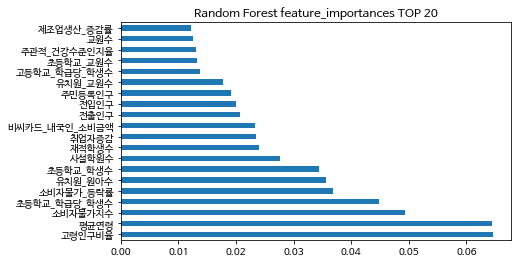

In [ ]:
import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
plt.figure(figsize=(7,4))
feat_importances = pd.Series(model2.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest feature_importances TOP 20')

In [ ]:
feat_importances.nlargest(20)

고령인구비율           0.064578
평균연령             0.064451
소비자물가지수          0.049386
초등학교_학급당_학생수     0.044805
소비자물가_등락률        0.036762
유치원_원아수          0.035605
초등학교_학생수         0.034420
사설학원수            0.027593
재적학생수            0.023947
취업자증감            0.023410
비씨카드_내국인_소비금액    0.023311
전출인구             0.020606
전입인구             0.019928
주민등록인구           0.019177
유치원_교원수          0.017678
고등학교_학급당_학생수     0.013773
초등학교_교원수         0.013254
주관적_건강수준인지율      0.013035
교원수              0.012464
제조업생산_증감률        0.012185
dtype: float64

Text(0.5, 1.0, 'XGBOOST feature_importances TOP 20')

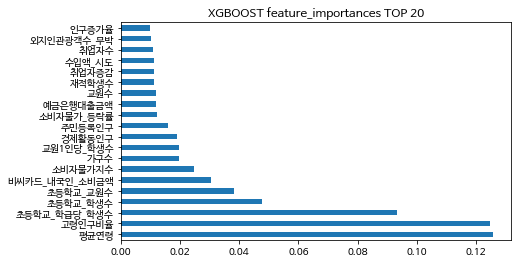

In [ ]:
#xgboost feature importances
plt.figure(figsize=(7,4))
feat_importances2 = pd.Series(model4.feature_importances_, index=x_test.columns)
feat_importances2.nlargest(20).plot(kind='barh')
plt.title('XGBOOST feature_importances TOP 20')

In [ ]:
feat_importances2.nlargest(20)

평균연령             0.125649
고령인구비율           0.124750
초등학교_학급당_학생수     0.093384
초등학교_학생수         0.047804
초등학교_교원수         0.038118
비씨카드_내국인_소비금액    0.030483
소비자물가지수          0.024754
가구수              0.019797
교원1인당_학생수        0.019691
경제활동인구           0.018844
주민등록인구           0.015984
소비자물가_등락률        0.012251
예금은행대출금액         0.012027
교원수              0.011749
재적학생수            0.011302
취업자증감            0.011240
수입액_시도           0.011082
취업자수             0.010934
외지인관광객수_무박       0.010238
인구증가율            0.009982
dtype: float32

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 5496 to 4265
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   티맵_자연관광지_검색건수        1800 non-null   int64  
 1   티맵_역사관광지_검색건수        1800 non-null   float64
 2   티맵_휴양관광지_검색건수        1800 non-null   float64
 3   티맵_공연_행사_검색건수        1800 non-null   float64
 4   티맵_문화시설_검색건수         1800 non-null   float64
 5   티맵_레포츠(육상해상항공)_검색건수  1800 non-null   float64
 6   티맵_쇼핑_검색건수           1800 non-null   float64
 7   티맵_식음료_검색건수          1800 non-null   int64  
 8   티맵_숙박_검색건수           1800 non-null   int64  
 9   티맵_기타관광지_검색건수        1800 non-null   int64  
 10  비씨카드_내국인_소비금액        1800 non-null   int64  
 11  비씨카드_외국인_소비금액        1800 non-null   float64
 12  비씨카드_거주민_소비금액        1800 non-null   int64  
 13  외국인관광객수_무박           1800 non-null   float64
 14  외국인관광객수_1박           1800 non-null   float64
 15  외국인관광객수_2박           1800 non-null 

# 변수 중요도가 높은 변수의 부분 의존성 그래프 그리기

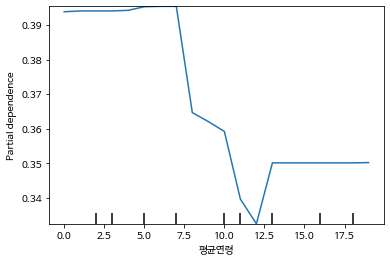

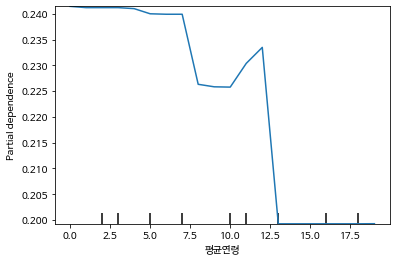

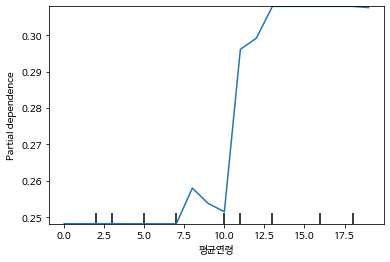

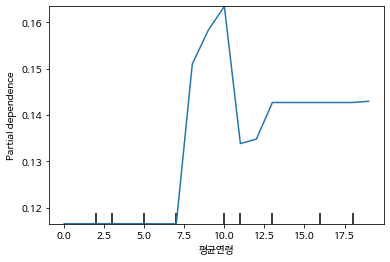

In [ ]:
# 변수 중요도가 높은 변수의 부분 의존성 그래프 그리기
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
from sklearn.inspection import plot_partial_dependence

#평균연령 부분 의존성 그래프
print(PartialDependenceDisplay.from_estimator(model4, x_train, [51], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [51], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [51], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [51], target=4))

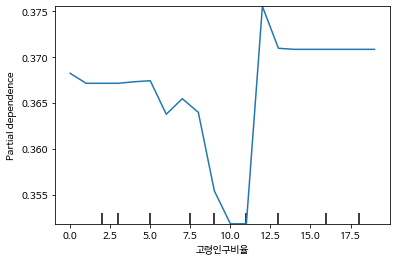

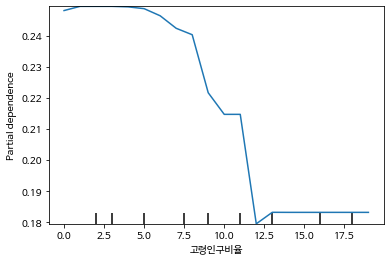

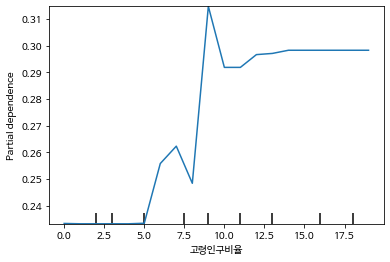

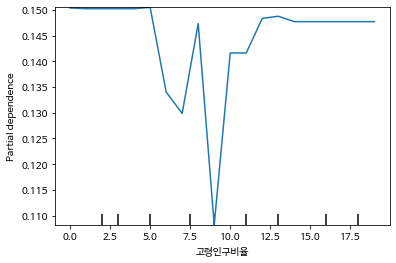

In [ ]:
#고령인구비율

print(PartialDependenceDisplay.from_estimator(model4, x_train, [25], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [25], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [25], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [25], target=4))

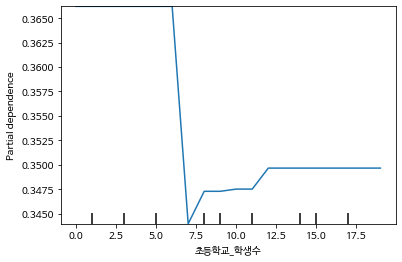

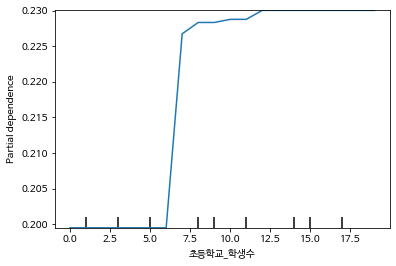

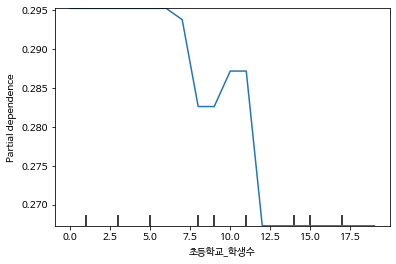

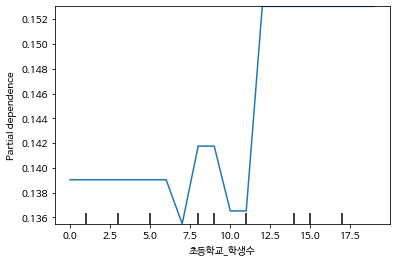

In [ ]:
#초등학교_학생수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [37], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [37], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [37], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [37], target=4))

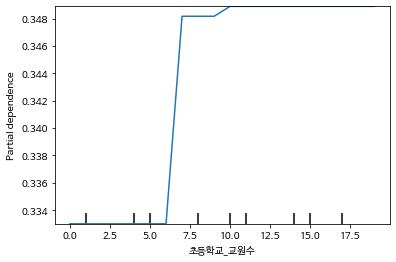

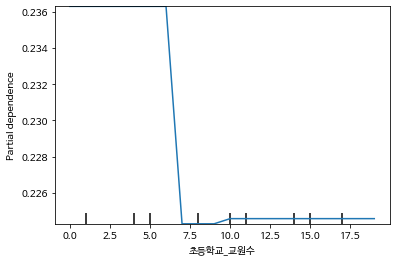

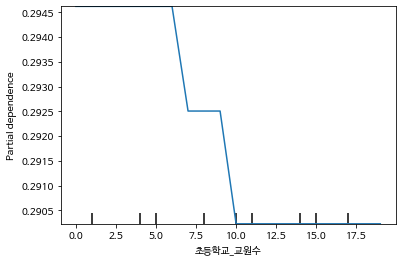

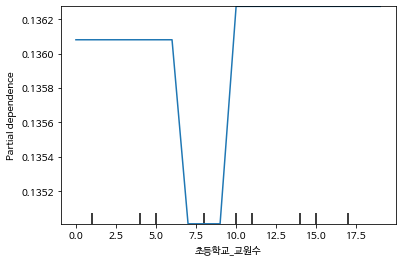

In [ ]:
#초등학교_교원수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [36], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [36], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [36], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [36], target=4))

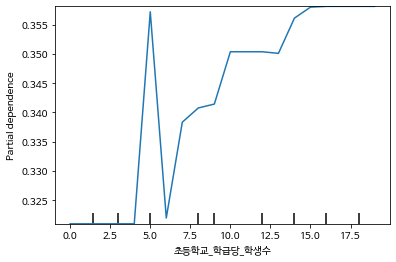

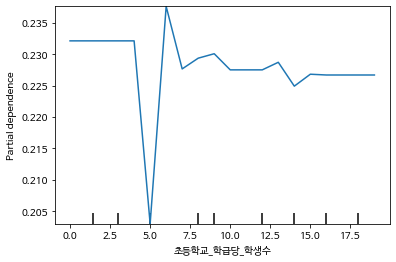

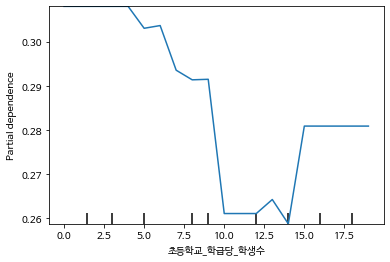

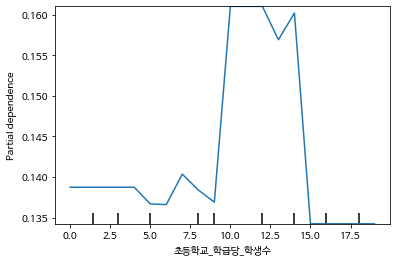

In [ ]:
#초등학교_학급당_학생수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [39], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [39], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [39], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [39], target=4))

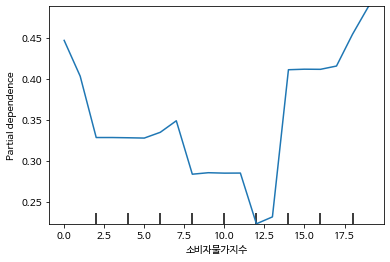

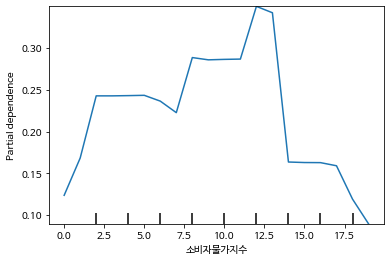

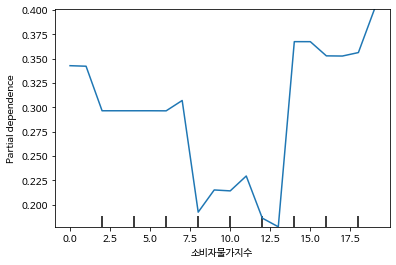

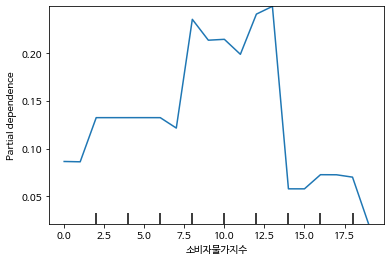

In [ ]:
#소비자물가지수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [70], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [70], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [70], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [70], target=4))

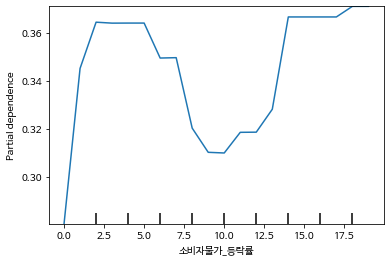

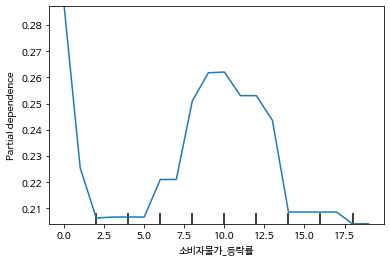

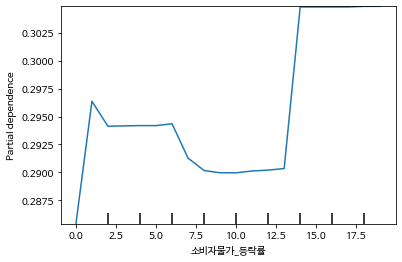

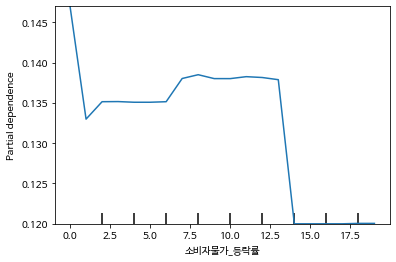

In [ ]:
#소비자물가_등락률

print(PartialDependenceDisplay.from_estimator(model4, x_train, [71], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [71], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [71], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [71], target=4))

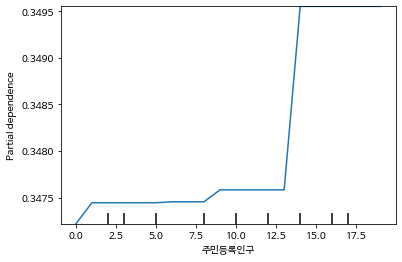

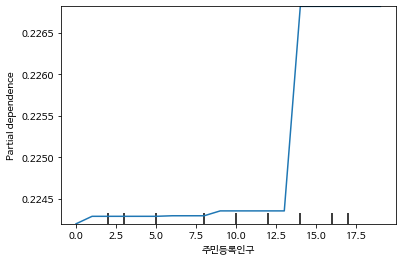

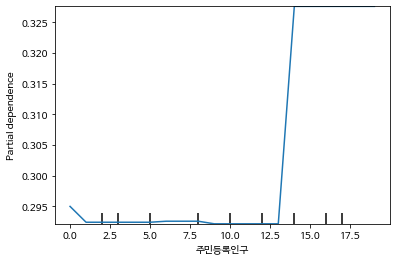

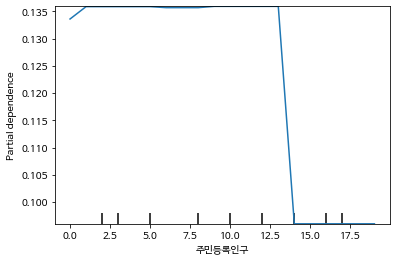

In [ ]:
#주민등록인구

print(PartialDependenceDisplay.from_estimator(model4, x_train, [28], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [28], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [28], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [28], target=4))

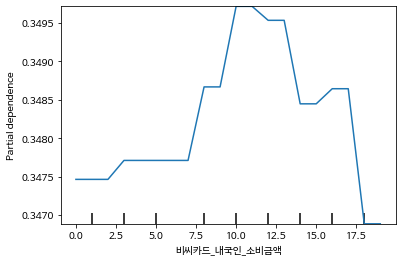

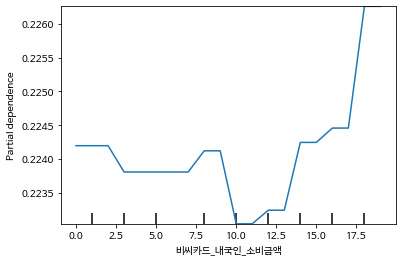

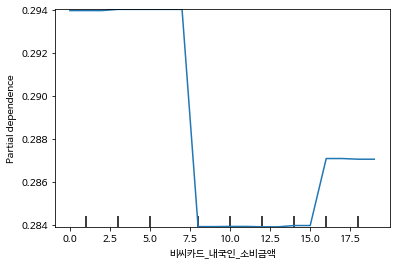

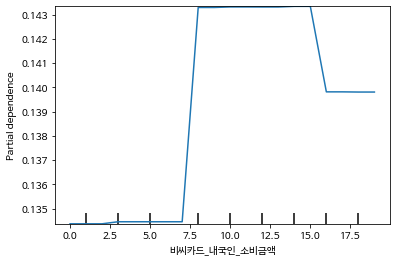

In [ ]:
#비씨카드_내국인_소비금액

print(PartialDependenceDisplay.from_estimator(model4, x_train, [10], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [10], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [10], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [10], target=4))

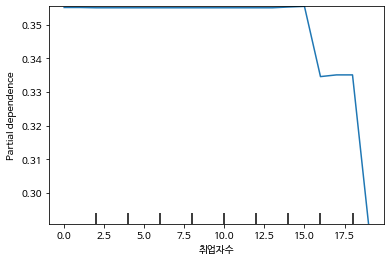

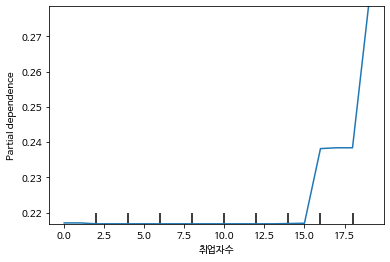

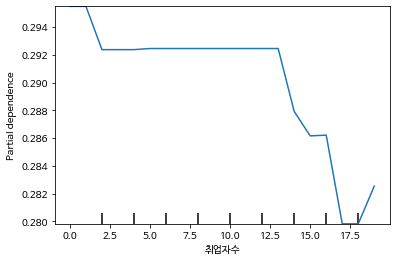

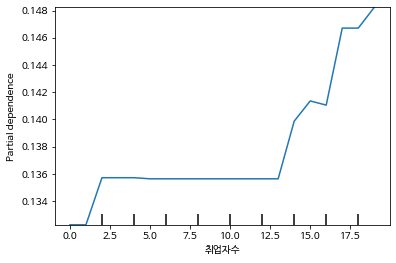

In [ ]:
#취업자수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [66], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [66], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [66], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [66], target=4))

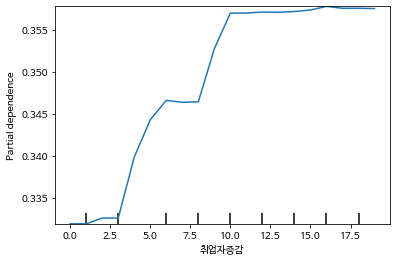

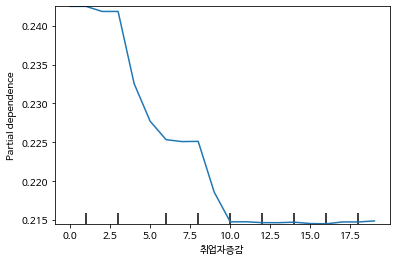

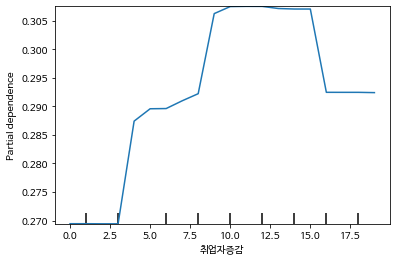

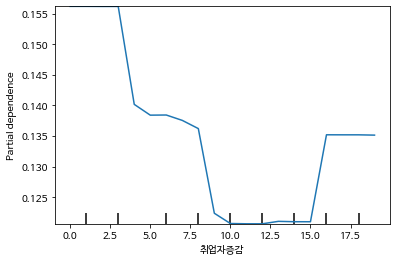

In [ ]:
#취업자증감

print(PartialDependenceDisplay.from_estimator(model4, x_train, [65], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [65], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [65], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [65], target=4))

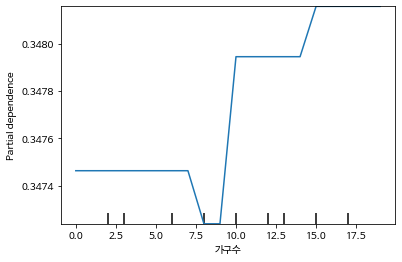

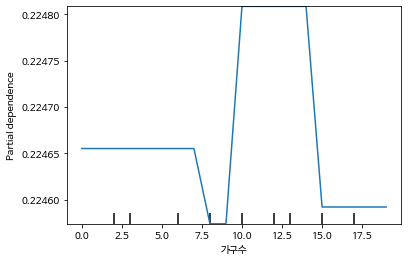

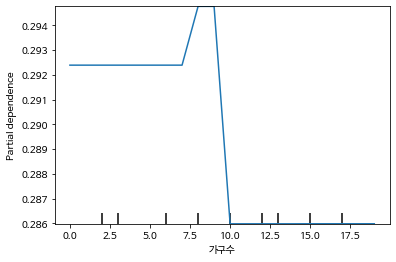

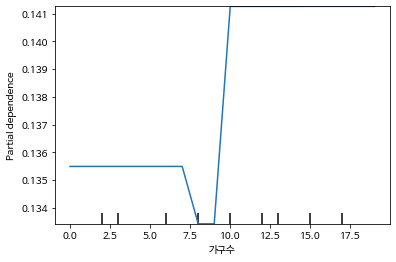

In [ ]:
#가구수 

print(PartialDependenceDisplay.from_estimator(model4, x_train, [61], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [61], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [61], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [61], target=4))

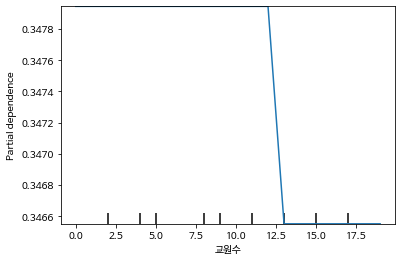

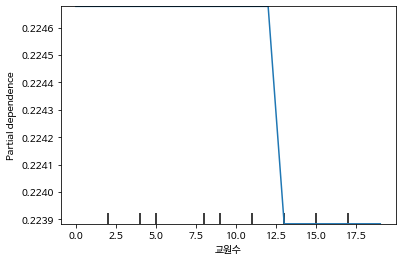

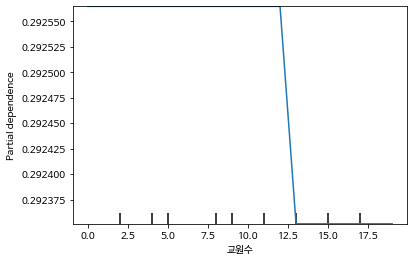

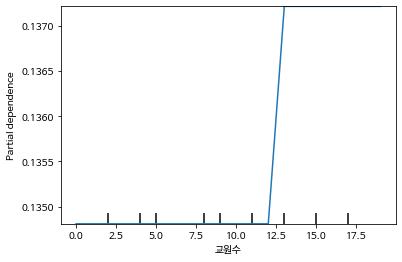

In [ ]:
#교원수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [32], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [32], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [32], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [32], target=4))

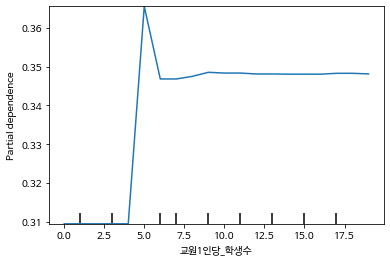

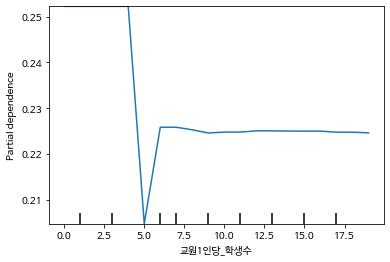

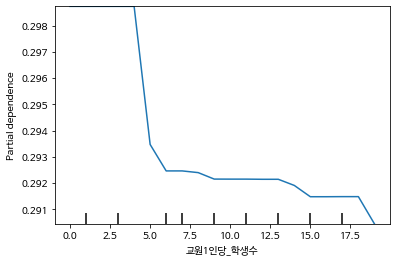

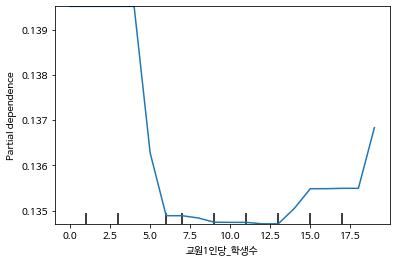

In [ ]:
#교원1인당_학생수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [30], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [30], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [30], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [30], target=4))

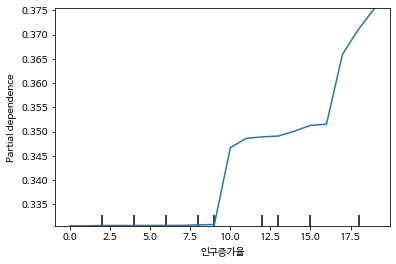

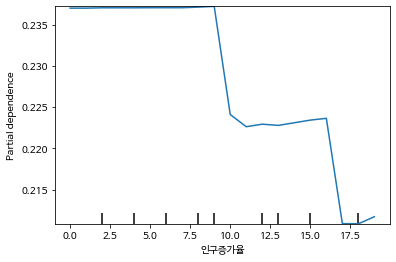

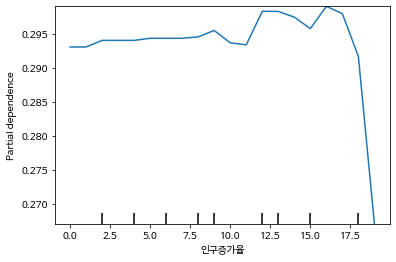

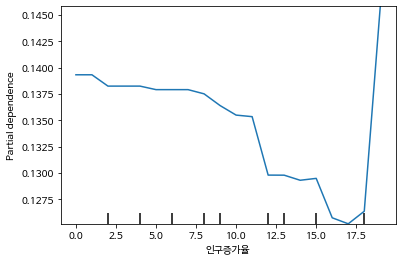

In [ ]:
#인구증가율

print(PartialDependenceDisplay.from_estimator(model4, x_train, [48], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [48], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [48], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [48], target=4))

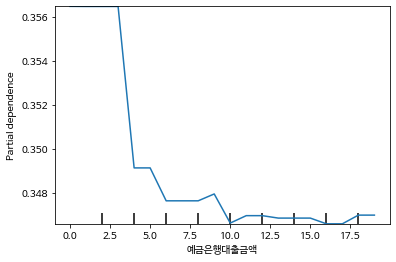

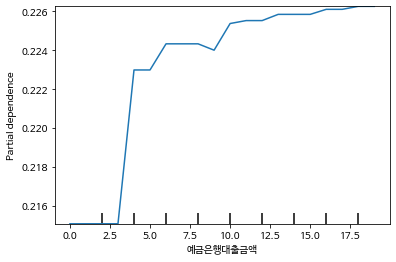

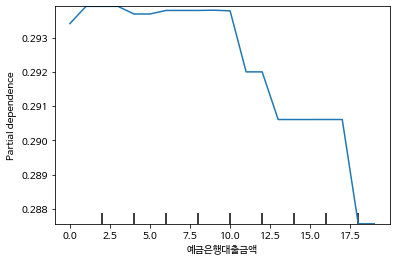

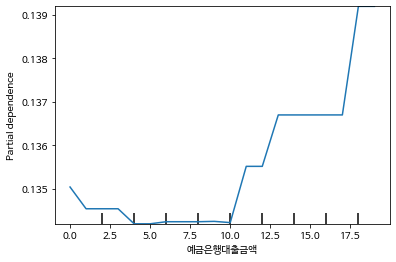

In [ ]:
#예금은행대출금액

print(PartialDependenceDisplay.from_estimator(model4, x_train, [73], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [73], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [73], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [73], target=4))

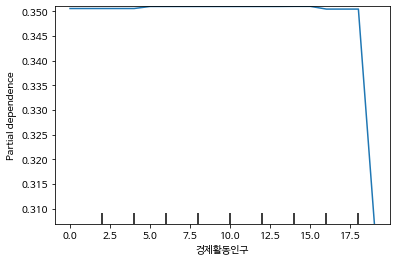

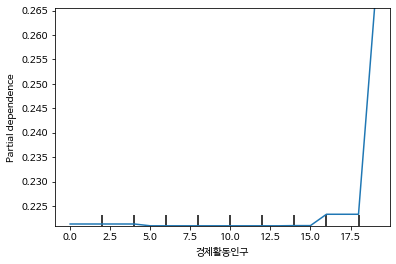

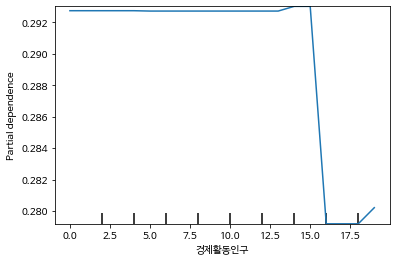

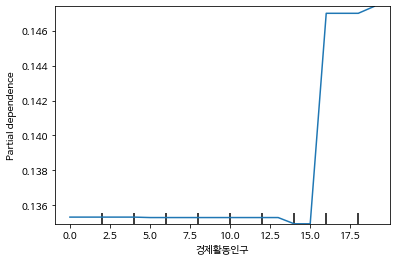

In [ ]:
#경제활동인구

print(PartialDependenceDisplay.from_estimator(model4, x_train, [74], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [74], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [74], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [74], target=4))

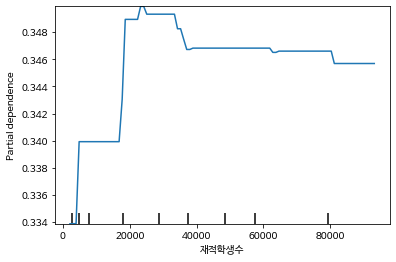

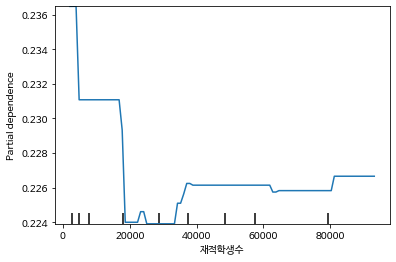

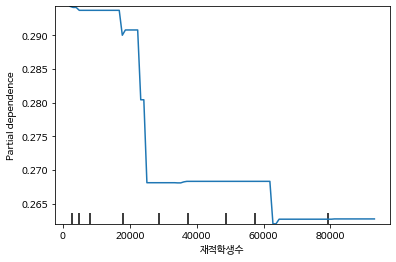

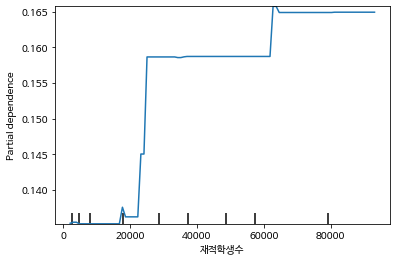

In [ ]:
#재적학생수

print(PartialDependenceDisplay.from_estimator(model4, x_train, [31], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [31], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [31], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [31], target=4))

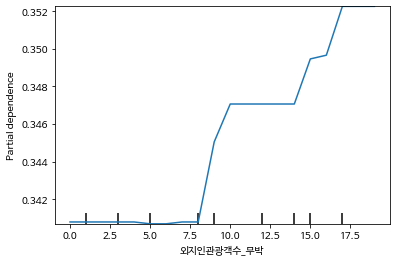

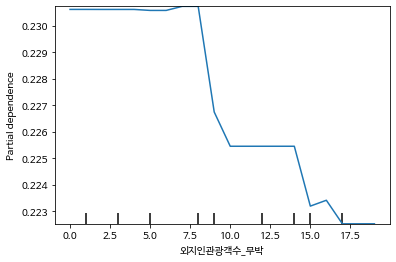

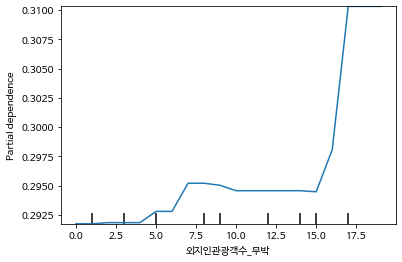

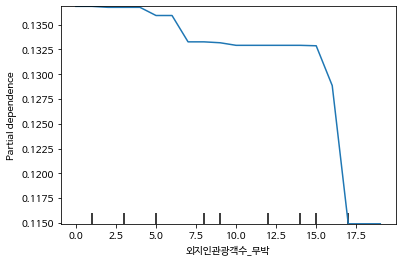

In [ ]:
#외지인관광객수_무박

print(PartialDependenceDisplay.from_estimator(model4, x_train, [17], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [17], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [17], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [17], target=4))

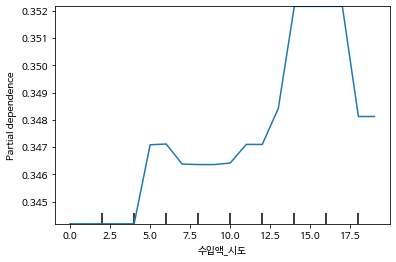

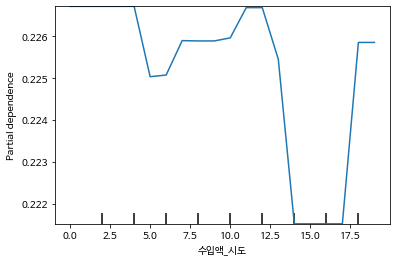

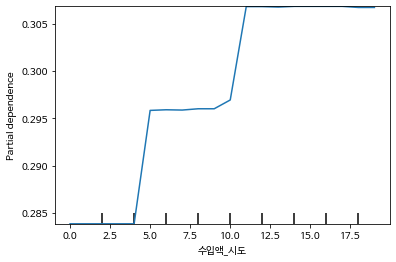

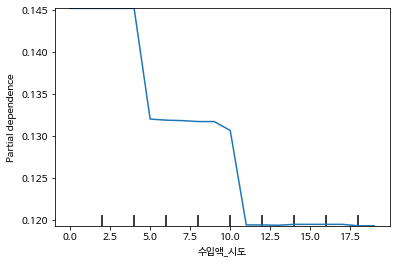

In [ ]:
#수입액_시도

print(PartialDependenceDisplay.from_estimator(model4, x_train, [63], target=1))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [63], target=2))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [63], target=3))
print(PartialDependenceDisplay.from_estimator(model4, x_train, [63], target=4))